In [1]:
import os
import google.generativeai as genai
import requests
import ast
import re
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML



In [2]:
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])
model = genai.GenerativeModel(model_name="models/gemini-1.5-pro-latest")
print(model)

genai.GenerativeModel(
    model_name='models/gemini-1.5-pro-latest',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)


In [3]:
def plot_1d_array(arr, title = "Line plot"):
    plt.cla()
    plt.clf()
    plt.title(title)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.plot(arr, color ="green")
    plt.ylim(-1.2, 1.2)
    plt.show()

# response = model.generate_content("Please give me python function code to read in a .png image file from a local folder and store it in a variable.")
# print(response.text)

In [4]:
def list_files_get_first():
    files = genai.list_files()
    for f in files:
        print(f.name, f.display_name)
    return next(genai.list_files())


def upload_file_to_gemini(image_path):
    image_name = image_path[image_path.rindex('/')+1:image_path.rindex('.')]
    file_up = genai.upload_file(path=image_path,
                                    display_name=image_name)

    print(f"Uploaded file '{file_up.display_name}' as: {file_up.uri}")
    return file_up


def delete_all_files():
    files = genai.list_files()
    for f in files:
        print('deleting:', f.name, f.display_name)
        genai.delete_file(f.name)


def delete_all_and_upload(image_path):
    delete_all_files()
    return upload_file_to_gemini(image_path)


def get_raw_array_from_gemini(response):
    literal = response.text[response.text.index('['):response.text.rindex(']')+1]
    arr = np.array(ast.literal_eval(literal))
    return arr

In [5]:
first_file = list_files_get_first()
print(f"Retrieved file '{first_file.display_name}' as: {first_file.uri}")

files/fpuy4rig36uw 03542be9b4f1409098343048ab9ad904
files/dgqyxdicv4sx 3611020c714740d7b3564d2da961bef5
files/te7037chpvwh 54f38fcbe9ca433bb0fd2e2aa55ba906
files/sdgyzr5amahb ff0bd5f58ed44f4ea188dfd252f64bbc
files/xznwke2bt1xa 156f9edb50a74b6fbd228c08d14f8e2b
files/4hbdkrv46vqq 6ea8b8071062403aa29543500c0dc79b
files/tosnib0e9fhw 8e42cb0166714231b98e87fd9445564d
files/m00wiasihq2n 1a990c15d9364af0ac70fa6657bc8828
files/z9ryizmyrchd a36fcdb4c72a41bb89b5d436f0c0bf57
files/7u3cri08yzda 019423f395044b57ba7f081f71e9fe79
files/7avgk7dr4c08 fad95840a3d64baf9148b45469185b0a
files/p684pq7cnu9s sin
files/wzrfp6y7a339 frown
files/u48dcdcffzn7 smile
files/ojc4bfvu4qkv zero_down
files/3qapmw2u6mbj zero_up
files/yghn029mgxyd zero
files/2fb1g7kcuj8i up_down_up_down_up
files/o2fz6mllymjk minus_one
files/4uamm60g9s6p plus_one
files/3cm8x40f3l6v line_down
files/4uxwfgh93bgo line_up
files/ng0txjhsoqfo smiles
Retrieved file '03542be9b4f1409098343048ab9ad904' as: https://generativelanguage.googleapis.com/v1

In [6]:
prompt = "Can you give me an approximate function to describe this line, keeping the y values between -1 and +1?"
prompt = "Can you break this line into 20 pieces and give me approximate x,y coordinates for each piece, with x starting at 0, and with the top of the image equal to 100, and the bottom of the image equal to -100, returning an array that should be assignable to a python variable using: ast.literal_eval()?"
prompt = "Can you break this line into 200 pieces and give me approximate x,y coordinates for each piece in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

prompt = "Can you summarize the this line, including a point for the very beginning and a point for the very end, into a number of pieces needed for a smooth approximation. Give me approximate x,y coordinates for each important point in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

prompt = "Can you break this line into about 30 points, including a point for the very beginning and a point for the very end, into a number of points needed for a smooth approximation. Give me approximate x,y coordinates for each important point in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

# prompt = "Can you give me an approximation for the leftmost point and rightmost point for this line? Give me approximate x,y coordinates for both points in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

# prompt = "Can you give me an approximation for the leftmost point and rightmost point for this line? The bottom left corner of the image should have coordinates (0, -1) and the top right corner should have coordinates (20, 1). Give me approximate x,y coordinates for both points in order, starting with x equal to 0, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

#prompt = "Can you give me a set of points that approximate this line? The bottom left corner of the image should have coordinates (0, -1) and the top right corner should have coordinates (20, 1). Give me approximate x,y coordinates for the important points in order, starting with x equal to 0, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

#prompt = "You are a geometry teacher. Can you give me a set of points that approximate this line into a smooth approximation? The bottom-left corner of the image should have coordinates (0, -1) and the top-right corner should have a y coordinate of 1. Give me approximate x,y coordinates for the important points of the line in order, starting with x equal to 0, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

#prompt = "Can you summarize the this line, including a point for the very beginning and a point for the very end, into about 20 pieces. Give me approximate x,y coordinates for each point in order, starting with x equal to 0, and with the vertical center equal to 0 on the y-axis, returning an array that should be assignable to a python variable using: ast.literal_eval()?"

train_smiles = "../data/lines/smiles.png"
train_smiles_prompt = "[1,0,-.41,-.73,-1,-.73,-.41,0,1,-.41,-.73,-1,-.73,-.41,0,1,-.41,-.73,-1,-.73,-.41,0,1]"
train_up = "../data/lines/line_up.png"
train_up_prompt = "[-1,-.9,-.8,-.7,-.6,-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]"
train_down = "../data/lines/line_down.png"
train_down_prompt = "[1,.9,.8,.7,.6,.5,.4,.3,.2,.1,0,-.1,-.2,-.3,-.4,-.5,-.6,-.7,-.8,-.9,-1]"
train_pos1 = "../data/lines/plus_one.png"
train_pos1_prompt = "[1,1]"#,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]"
train_neg1 = "../data/lines/minus_one.png"
train_neg1_prompt = "[-1,-1]"#,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]"
train_u_d_u_d_u = "../data/lines/up_down_up_down_up.png"
train_u_d_u_d_u_prompt = "[-1,-.75,-.5,-.25,0,.25,.5,.75,1,.75,.5,.25,0,-.25,-.5,-.75,-1,-.75,-.5,-.25,0,.25,.5,.75,1,.75,.5,.25,0,-.25,-.5,-.75,-1,-.75,-.5,-.25,0,.25,.5,.75,1]"
train_zero = "../data/lines/zero.png"
train_zero_prompt = "[0,0]"#,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]"
train_zero_up = "../data/lines/zero_up.png"
train_zero_up_prompt = "[0,0,0,0,0,0,0,0,0,0,0,0,.25,.5,.75,1]"
train_zero_down = "../data/lines/zero_down.png"
train_zero_down_prompt = "[0,0,0,0,0,0,0,0,0,0,0,0,-.25,-.5,-.75,-1]"
train_smile = "../data/lines/smile.png"
train_smile_prompt = "[1,0,-.41,-.73,-1,-.73,-.41,0,1]"
train_frown = "../data/lines/frown.png"
train_frown_prompt = "[1,2,2.41,2.73,3,2.73,2.41,2,1]"

f_train_smiles = delete_all_and_upload(train_smiles)

f_train_up = upload_file_to_gemini(train_up)
f_train_down = upload_file_to_gemini(train_down)
f_train_pos1 = upload_file_to_gemini(train_pos1)
f_train_neg1 = upload_file_to_gemini(train_neg1)
f_train_u_d_u_d_u = upload_file_to_gemini(train_u_d_u_d_u)
f_train_zero = upload_file_to_gemini(train_zero)
f_train_zero_up = upload_file_to_gemini(train_zero_up)
f_train_zero_down = upload_file_to_gemini(train_zero_down)
f_train_smile = upload_file_to_gemini(train_smile)
f_train_frown = upload_file_to_gemini(train_frown)


test_sin = "../data/lines/sin.png"
f_test_sin = upload_file_to_gemini(test_sin)



first_prompt = "Return a list of twenty elements, of only the values of the y coordinates for the given drawing of a line, with the y-axis ranging from -1 at the bottom to +1 at the top of the image."
first_prompt = "You are an image reader who specializes in the (x,y) cartesian plane. Please describe the image. Parse the image and find enough (x,y) coordinates to make a smooth approximation of the hand-drawn black line on a white background in the each image. The top edge of each image has represents a value of +1 on the y-axis. The bottom edge of each image represents a value of -1 on the y-axis. Return the description and a list of only the y coordinates in JSON format."
first_prompt = "You are an expert who extracts numerical data from images, specializing in the (x,y) cartesian plane. Please describe the image. The top-left corner of each image represents the coordinates (0,1). The bottom-left corner of each image represents the coordinates (0,-1). The top-right corner of each image represents the coordinates (20,1). The bottom-right corner of each image represents the coordinates (20,-1). Can you return the description and a list of the (x,y) coordinates in JSON format?" #  Parse the line in the image and find enough (x,y) coordinates to make a smooth approximation of the hand-drawn black line on a white background. The top-left corner of each image represents the coordinates (0,1). The bottom-left corner of each image represents the coordinates (0,-1). The top-right corner of each image represents the coordinates (20,1). The bottom-right corner of each image represents the coordinates (20,-1). Return the description and a list of only the y coordinates in JSON format."
first_prompt = "Describe the line in this image in terms of (x,y) coordinates. The bottom left corner of the image should have coordinates (0, -1) and the top right corner should have coordinates (20, 1). Return the description and a list of the y coordinates in JSON format."

response = model.generate_content([first_prompt,
                        #  f_train_up, train_up_prompt, f_train_down, train_down_prompt,
                        #  f_train_pos1 , train_pos1_prompt, f_train_neg1, train_neg1_prompt,
                        #  f_train_u_d_u_d_u, train_u_d_u_d_u_prompt, f_train_zero, train_zero_prompt,
                        #  f_train_zero_up, train_zero_up_prompt, f_train_zero_down, train_zero_down_prompt,
                        #  f_train_smile, train_smile_prompt, f_train_frown, train_frown_prompt,
                               f_train_smiles     ])


print("response:", response.text)

arr = get_raw_array_from_gemini(response)
arr

deleting: files/fpuy4rig36uw 03542be9b4f1409098343048ab9ad904
deleting: files/dgqyxdicv4sx 3611020c714740d7b3564d2da961bef5
deleting: files/te7037chpvwh 54f38fcbe9ca433bb0fd2e2aa55ba906
deleting: files/sdgyzr5amahb ff0bd5f58ed44f4ea188dfd252f64bbc
deleting: files/xznwke2bt1xa 156f9edb50a74b6fbd228c08d14f8e2b
deleting: files/4hbdkrv46vqq 6ea8b8071062403aa29543500c0dc79b
deleting: files/tosnib0e9fhw 8e42cb0166714231b98e87fd9445564d
deleting: files/m00wiasihq2n 1a990c15d9364af0ac70fa6657bc8828
deleting: files/z9ryizmyrchd a36fcdb4c72a41bb89b5d436f0c0bf57
deleting: files/7u3cri08yzda 019423f395044b57ba7f081f71e9fe79
deleting: files/7avgk7dr4c08 fad95840a3d64baf9148b45469185b0a
deleting: files/p684pq7cnu9s sin
deleting: files/wzrfp6y7a339 frown
deleting: files/u48dcdcffzn7 smile
deleting: files/ojc4bfvu4qkv zero_down
deleting: files/3qapmw2u6mbj zero_up
deleting: files/yghn029mgxyd zero
deleting: files/2fb1g7kcuj8i up_down_up_down_up
deleting: files/o2fz6mllymjk minus_one
deleting: files/4u

array([-1. , -0.5,  0. , -0.5, -1. , -0.5,  0. , -0.5, -1. ])

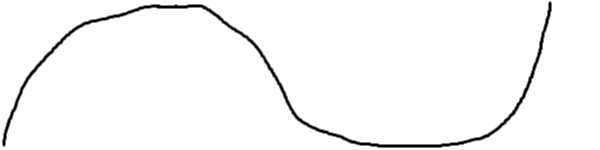

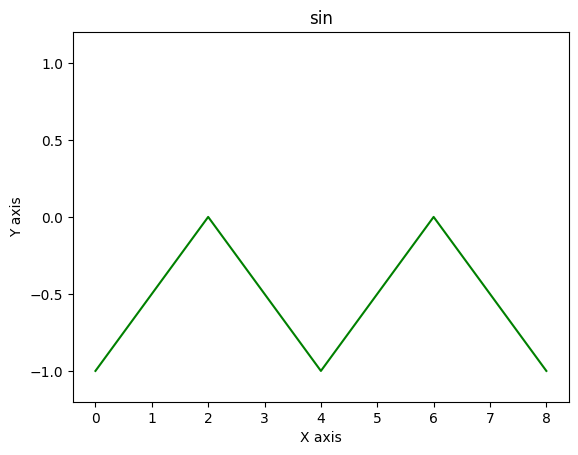

In [7]:

display(Image(filename=test_sin, width='300'))
plt.close()
plot_1d_array(arr, f_test_sin.display_name)


In [8]:
def get_line_from_image_PIL(img_path):
    # This transpose is needed because PIL opens the image with the origin in the top left corner
    img = PIL.Image.open(img_path).transpose(PIL.Image.Transpose.FLIP_TOP_BOTTOM)
    img = img.convert("RGB")
    w, h = img.size
    data = img.load()

    # will be a list of tuples of x,y coordinates
    pieces = []
    for x in range(w):
        for y in range(h):
            if data[x,y] != (255, 255, 255):
                #print(x, y)
                pieces.append((x, y))

    # get the mean y value for each x value
    # https://stackoverflow.com/questions/50950231/group-by-with-numpy-mean
    np_arr = np.array(pieces)
    xs = np.unique(np_arr[:,0])
    y_means = [np.mean(np_arr[np_arr[:,0] == x, 1:]) for x in xs]
    return (np.array(y_means)-(h/2))/(h/2)


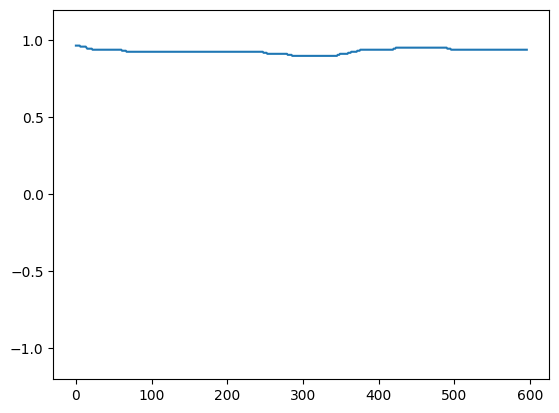

[-0.90666667 -0.86       -0.84       -0.82       -0.75333333 -0.69333333
 -0.66       -0.62       -0.57333333 -0.54       -0.52666667 -0.48666667
 -0.44       -0.40666667 -0.38666667 -0.35333333 -0.32       -0.27333333
 -0.24666667 -0.22       -0.19333333 -0.16       -0.12666667 -0.10666667
 -0.08666667 -0.06666667 -0.04666667 -0.02666667 -0.00666667  0.00666667
  0.02        0.04        0.06        0.07333333  0.08666667  0.1
  0.12        0.14        0.14666667  0.16        0.18        0.19333333
  0.20666667  0.22        0.23333333  0.25333333  0.26666667  0.28
  0.29333333  0.31333333  0.32        0.32666667  0.34        0.36666667
  0.38        0.39333333  0.4         0.41333333  0.44        0.44666667
  0.45333333  0.47333333  0.49333333  0.5         0.50666667  0.52666667
  0.53333333  0.54666667  0.55333333  0.56666667  0.58        0.58666667
  0.6         0.60666667  0.62        0.62        0.63333333  0.64
  0.64666667  0.66        0.66        0.67333333  0.67333333  0.68
  0

In [9]:
plt.plot(get_line_from_image_PIL(train_pos1))
plt.ylim(-1.2, 1.2)
plt.show()
print(get_line_from_image_PIL(test_sin))